Title: Plant Disease Classification
Authors: Anna Meshejian, Leonard Genders
Date: October 4th, 2024
Course: BUAD 5802 (AA): Artificial Intelligence Applications for Business

In [ ]:
# Import the necessary libraries and packages
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import cv2 as cv
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from pprint import pprint

In [ ]:
# import AgML
!pip install -q agml albumentations

!pip install -q pytorch-lightning ensemble-boxes effdet==0.2.4


In [ ]:
# import AgML
import agml
import agml.viz as viz
import agml.models
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


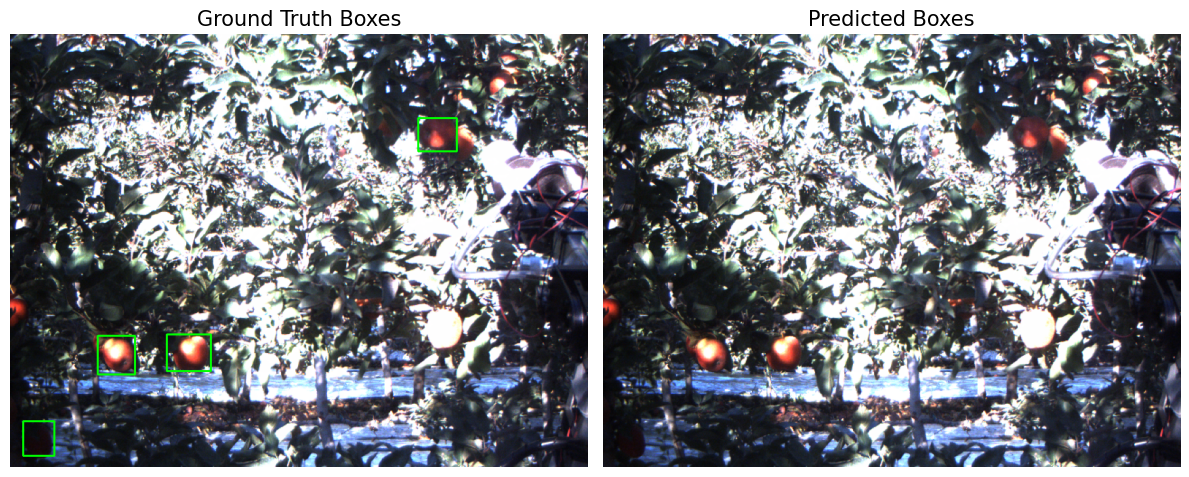

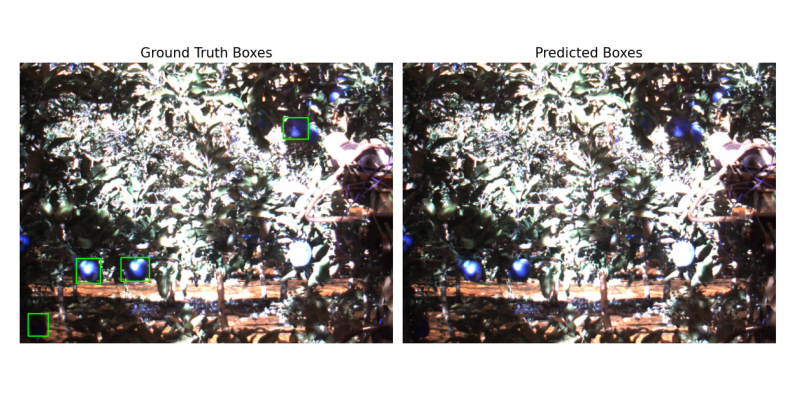

In [ ]:
# Construct a one-class model.
detector = agml.models.DetectionModel(num_classes = 1)

# Visualize predictions.
apple_day = agml.data.AgMLDataLoader('apple_detection_usa')
image, truth = apple_day[0]
pred_boxes, *_ = detector.predict(image)

# Convert pred_boxes to the correct format
pred_boxes = np.array(pred_boxes).reshape(-1, 4) # Reshape the flat list into a 2D array

_ = agml.viz.show_object_detection_truth_and_prediction(image, real_boxes = truth['bbox'], predicted_boxes = pred_boxes) # Access the 'bbox' value from the truth dictionary

/usr/local/lib/python3.10/dist-packages/agml/models/base.py:176: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(benchmark_path, map_location = 'cpu')


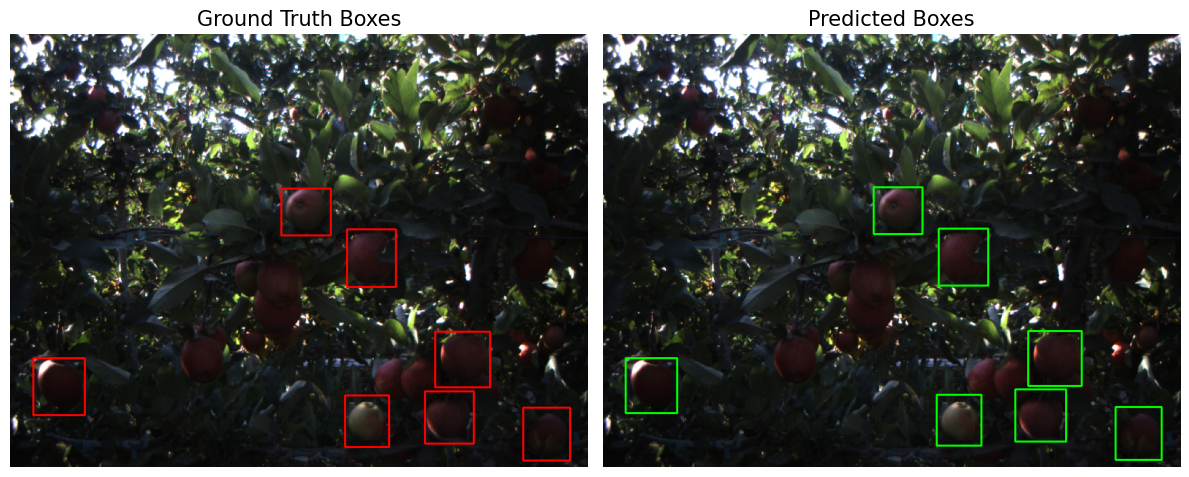

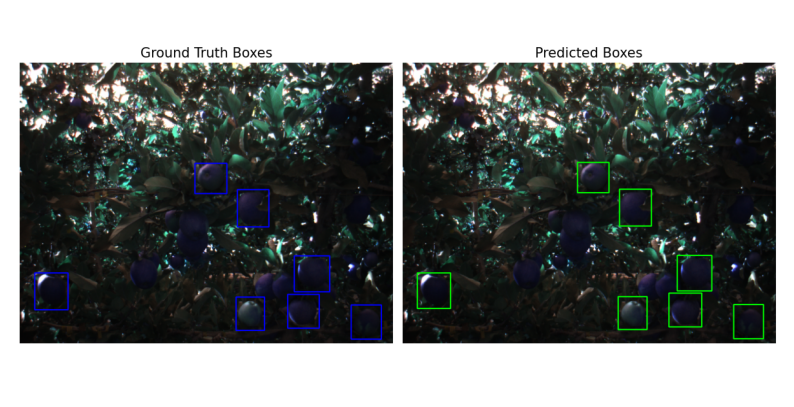

In [ ]:
# Load the `apple_detection_usa` benchmark.
detector.load_benchmark('apple_detection_usa')

# Visualize predictions.
image, truth = apple_day[1]
pred_boxes, *_ = detector.predict(image)
_ = agml.viz.show_object_detection_truth_and_prediction(image, real_boxes = truth, predicted_boxes = pred_boxes)

In [ ]:
print(detector.benchmark)

<Benchmark apple_detection_usa>({'metric': {'mAP': 94.16}, 'hyperparameters': {'epochs': 50, 'model_config': {'box_loss_weight': 100.0, 'image_size': [512, 512], 'confidence_threshold': 0.3}, 'optimizer_config': {'lr': 0.0002}}})
